<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию" data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию</a></span></li><li><span><a href="#Подготовьте-данные" data-toc-modified-id="Подготовьте-данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовьте данные</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span></li><li><span><a href="#Составьте-портрет-пользователя-каждого-региона" data-toc-modified-id="Составьте-портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составьте портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверьте-гипотезы" data-toc-modified-id="Проверьте-гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверьте гипотезы</a></span></li></ul></div>

# Сборный проект 1

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

##  Откройте файл с данными и изучите общую информацию

Описание данных

-  **Name** — название игры
-  **Platform** — платформа
-  **Year_of_Release** — год выпуска
-  **Genre** — жанр игры
-  **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
-  **EU_sales** — продажи в Европе (миллионы проданных копий)
-  **JP_sales** — продажи в Японии (миллионы проданных копий)
-  **Other_sales** — продажи в других странах (миллионы проданных копий)
-  **Critic_Score**— оценка критиков (максимум 100)
-  **User_Score** — оценка пользователей (максимум 10)
-  **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [53]:
#Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [54]:
#Присваиваем датасет переменной

games_data = pd.read_csv('games.csv')

#покажем таблицу
display(games_data)

#Выведем информацию о данных в датасете
games_data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [55]:
games_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [56]:
#проверим датафрейм на наличие дупликатов
games_data.duplicated().sum()

0

В таблице 16715 строк, 11 столбцов.

Ряд столбцов имеет пропуски:
- **Name**
- **Year of Release**
- **Genre**
- **Critic Score**
- **User Score**
- **Rating**

Дупликаты отсутствуют

## Подготовьте данные

In [57]:
#переведем названия столбцов в нижний регистр
#текстовые значения столбцов также переведем в нижний регистр (так мы учтем одинаковые названия, которые могли быть указаны в разных регистрах)
games_data.columns = games_data.columns.str.lower()
for name in games_data[['name','platform','genre', 'rating']]:
    games_data[name] = games_data[name].str.lower()

In [58]:
#перед изменением типов данных исследуем столбцы year_of_release и user_score 
#на наличие уникальных значений
print(f'список значений столбца year_of_release \n\
\n\
{games_data["year_of_release"].unique()} \n\
')
print(f'список значений столбца user_score \n\
\n\
{games_data["user_score"].unique()} \n\
')


games_data['user_score'].value_counts()

список значений столбца year_of_release 

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.] 

список значений столбца user_score 

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7'] 



tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Столбец **year_of_release** имеет только численные значения и пропуски.

Столбец **user_score** имеет численные значения, пропуски и значение *tbd*.

Согласно поисковику, такие значения указываются перед уточнением. Вполне вероятно, что их просто забыли указать. Поэтому при переводе в численный тип будем учитывать его как пропуск

In [59]:
#заменим тип данных столбца year_of_release и user_score к численному типу данных
#в местах возникновения ошибки, данные заменяются на пропуск NaN 
games_data['year_of_release'] = pd.to_numeric(games_data['year_of_release'], errors = 'coerce')
games_data['year_of_release'] = games_data['year_of_release'].astype("Int64")
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors = 'coerce')

games_data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [60]:
#Отсеем строки с пропусками в year_of_release
games_data = games_data[games_data["year_of_release"].isna()==False]
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [61]:
games_data['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Совсем незначительно получилось уеньшить число пропусков в столбцу **rating**. На 354, если быть точным

In [62]:
games_data['rating'] = games_data['rating'].fillna('noESRB') 


In [63]:
#добавим столбец суммарных продаж
games_data['all_sales'] = (games_data['na_sales'] + \
                           games_data['eu_sales'] + \
                           games_data['jp_sales'] + \
                           games_data['other_sales'] 
                           )

In [64]:
games_data = games_data[games_data['genre'].isna()==False]
games_data = games_data[games_data['name'].isna()==False]
games_data['critic_score'] = games_data['critic_score'].fillna(-1)
games_data['user_score'] = games_data['user_score'].fillna(-1)

In [65]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


## Проведите исследовательский анализ данных

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

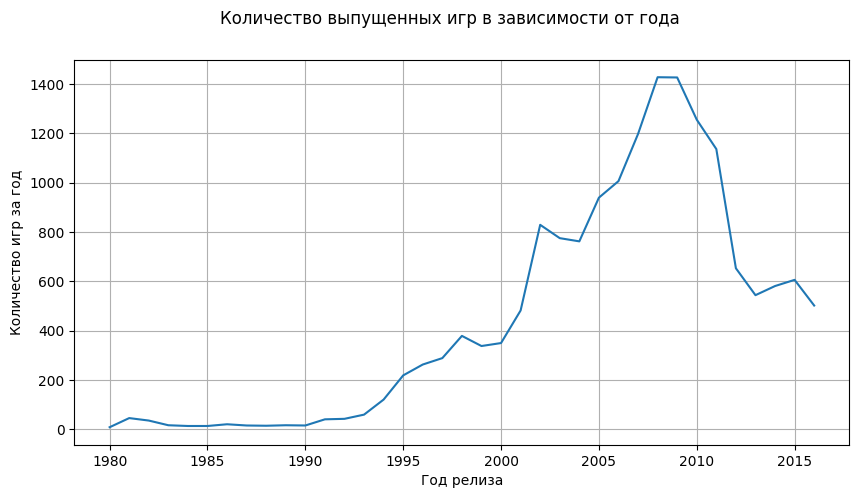

In [66]:
#узнаем, сколько игр выпускалось в разные годы.
display(games_data.groupby('year_of_release')['name'].count().sort_index(ascending =True))
#построим график зависимости количества выпущенных игр от года
games_data.groupby('year_of_release')['name'].count().sort_index(ascending =True).plot(grid = True, figsize = (10,5))
plt.suptitle('Количество выпущенных игр в зависимости от года')
plt.ylabel('Количество игр за год')
plt.xlabel('Год релиза')
plt.show()

Отсутсвие  чуть более 100 значений столбца **year_of_release** никак не сказлось на зависимости - отчетливо виден тренд роста после 1990 года продолжающийся до 2008, после чего тренд развернулся.

In [67]:
#посчитаем для каждой платформы суммарное количество продаж и выберем свой топ-10
top_platforms = games_data[['platform', 'all_sales']].groupby(['platform']) \
   .sum().sort_values('all_sales', ascending =False).head(10)

display(top_platforms)

,all_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


In [68]:
#5 и 6 место отличаются в 2 раза, поэтому оставим топ-5 
top_platforms = top_platforms.head()

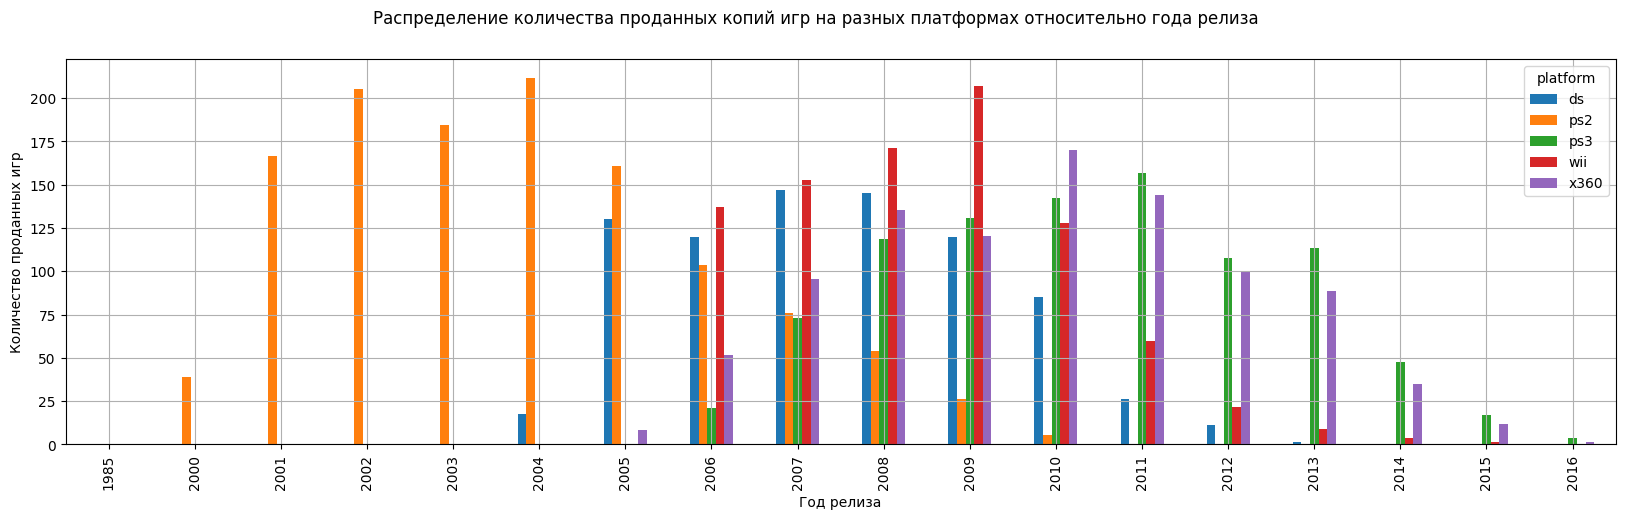

In [69]:
#с помощью сводной таблицы сгруппируем по годам общее количество продаж
#и выявим информацию графически для платформ из списка топ-5 
platform_pivot = games_data[games_data['platform'].isin(list(top_platforms.index))]\
    .pivot_table(index = ['year_of_release'],columns = 'platform', values = 'all_sales', aggfunc = 'sum')
platform_pivot.plot(kind = 'bar', grid = True, figsize = (20, 5), xlim = (2000, 2017))
plt.suptitle('Распределение количества проданных копий игр на разных платформах относительно года релиза')
plt.ylabel('Количество проданных игр')
plt.xlabel('Год релиза')
plt.show()

Из графика видно, как одно поколение приставок сменялось другим:

- с 2000 и до 2004 почти ежегдно росли продажи ***ps2***

- в 2004 году в продажу вышли ***ds*** и из-за конкуренции продажи ***ps2*** начали уменьшаться

- в 2006 на рынок вышло новое поколение приставок ***ps3***, ***x360***,  ***wii*** (последний к слову продавался активней всех по началу, но затем резко уменьшился спрос в результате чего, в долгосрочном измерении продажи конкурентов оказались выше)

В среднем, средняя продлжительость жизни платформ ~ 9 лет

В качестве акутального периода можно выбрать данные после ~2005~ 2011 года, так как именно в этот год начался выпуск большинства самых продающихся платформ, а также учитывая среднюю "жизнь" платформ.

В соответствии с этим, мы можем оценить их текущее состояние (на 2016) на рынке и спрогнозировать показатели на 2017

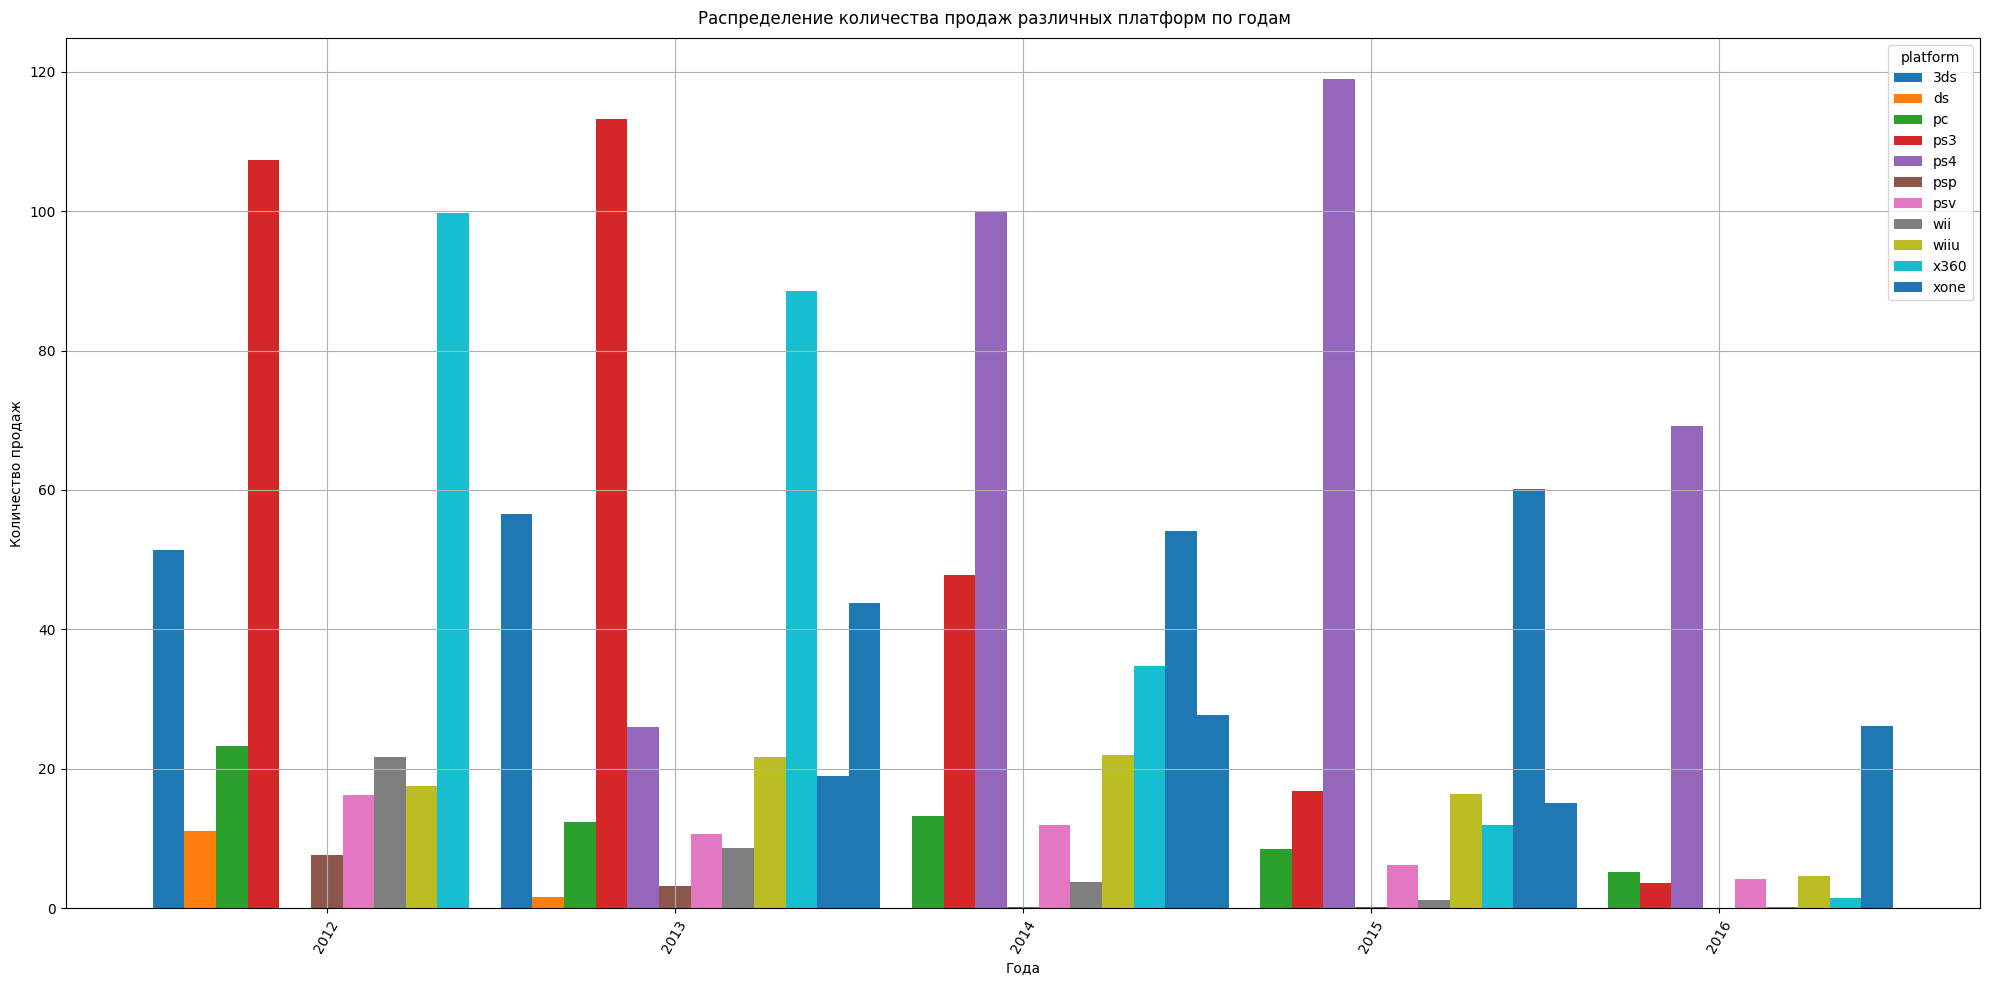

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,-,7.69,16.19,21.71,17.56,99.74,-
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,-,13.28,47.76,100.0,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,-,8.52,16.82,118.9,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,-,5.25,3.60,69.25,-,4.25,0.18,4.60,1.52,26.15


In [70]:
#аналогично прошлому пункту, с помощью сводной таблицы сгруппируем по годам общее количество продаж
#и выявим информацию графически для платформ с 2012 года  

actual_platform_pivot = games_data[games_data['year_of_release'] >= 2012 ] \
    .pivot_table(index = ['year_of_release'],columns = 'platform', values = 'all_sales', aggfunc = 'sum')
actual_platform_pivot.plot(kind = 'bar', grid = True, figsize = (20, 10), width = 1, rot = 60 )
plt.suptitle('Распределение количества продаж различных платформ по годам')
plt.ylabel('Количество продаж')
plt.xlabel('Года')

plt.tight_layout()
plt.show()
#представим данные сводной таблицы
display(actual_platform_pivot.fillna('-'))

Из данной выборки явными фаворитами являются следующие платформы:

- ***ps4*** - продажи на 2016 год составляют 69,25 млн игр на платформу

- ***xone*** - продажи на 2016 год составляют 26,15 млн игр на платформу

- ***3ds*** - продажи на 2016 год составляют 15,14 млн игр на платформу

Стоит отметить, что данные за 2016 год могут быть неполными (по условию). Например, если данные собраны за первые полгода 2016. При этом, судя по данным, можно предположить, что растут продажи игр у ***ps4*** и ***xone***. Игры же для остальных платформ или остаются на том же уровне продаж, или уже имеют убывающий тренд.

Причина их большого объема продаж и их растущего тренда продаж прежде всего возраст - высокий спрос на игры молодых и мощных платформ, относительно своих конкурентов в лице ***ps3***, ***xbox360***, ***wii***. 

Также можно отметить "переток" покупателей игр, когда выходит новое поколение:

- ***ps3*** и ***ps4*** в 2014

- ***x360*** и ***xone*** в 2014

- ***wii*** и ***wiiu*** в 2013

- ***psp*** и ***psv*** в 2012

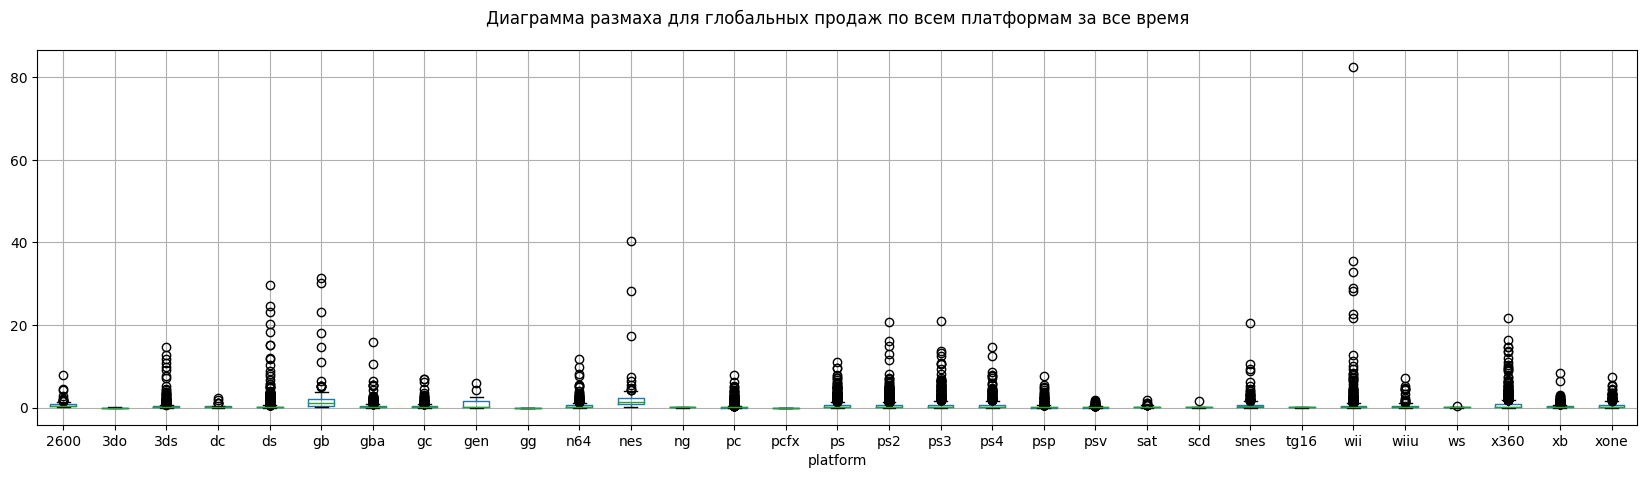

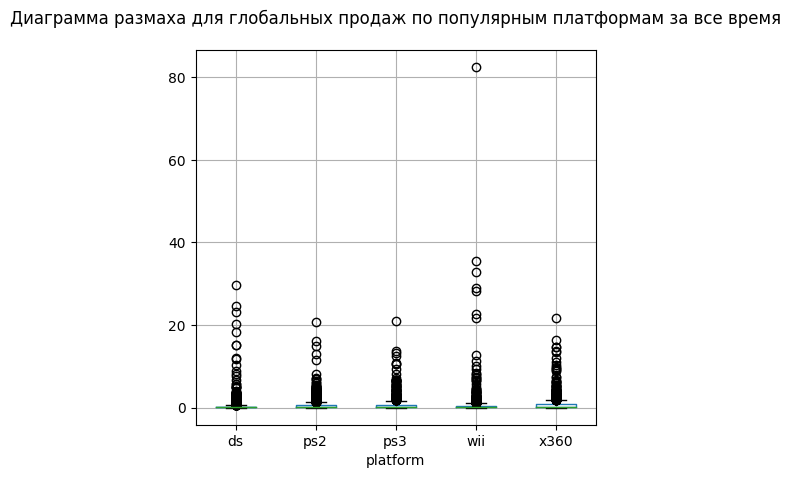

platform        ds       ps2       ps3       wii      x360
count     2121.000  2127.000  1306.000  1286.000  1232.000
mean         0.378     0.580     0.713     0.693     0.780
std          1.436     1.138     1.403     3.165     1.632
min          0.010     0.000     0.000     0.010     0.010
25%          0.050     0.080     0.110     0.090     0.110
50%          0.110     0.230     0.280     0.190     0.280
75%          0.270     0.560     0.760     0.487     0.770
max         29.800    20.810    21.050    82.540    21.820


In [71]:
#построим диаграмму размаха для глобальных продаж с разбивкой по платформам

games_data.boxplot(column = 'all_sales', by = 'platform',figsize = (20, 5)) 
plt.title('')
plt.suptitle('Диаграмма размаха для глобальных продаж по всем платформам за все время')

games_data[games_data['platform'].isin(list(top_platforms.index))].boxplot(column = 'all_sales', 
                                                                           by = 'platform',figsize = (5, 5))
#plt.ylim(0,2) 
plt.title('')
plt.suptitle('Диаграмма размаха для глобальных продаж по популярным платформам за все время')
plt.show()

print(games_data[games_data['platform'].isin(list(top_platforms.index))]\
      .groupby(by='platform')['all_sales'].describe().round(3).T)

Соласно графику "ящик с усами", среди популярных платформ медианное значение расположено около 0,25 млн копий.

Верхняя граница графиков распределена неравномерно, которые определяют выбросы: 

- для ***ps3*** и ***x360*** значения ~ 1,7 млн

- для ***wii*** и ***ps2*** лежат в диапазоне 1,1 .. 1,3 млн

Довольно сильно среди выборки выделяется ds: 

- медиана 0,11 млн 

- верхняя граница 0,6 млн

Соответственно, для более популярных платформ средняя величина будет больше. Верхняя граница определяет количество удачных проектов для данной платформы - чем выше граница, тем больше таких проектов было 

In [72]:
#проанализируем зависимость продаж игр от влияния оценок критиков и пользователей
#выберем платформу, где наибольшее количество оценок
games_data[['platform', 'critic_score', 'user_score']]\
.groupby('platform')[['critic_score', 'user_score']]\
.count().sort_values('critic_score', ascending = False).head(1)

,critic_score,user_score
platform,,
ps2,2127,2127


In [73]:
#посчитаем коэффициент Пирсона пар значений общих продаж и вида оценок
games_data[(games_data['platform'] =='ps2') &
          (games_data['critic_score']>=0) &
          (games_data['user_score']>=0)][['all_sales', 'critic_score', 'user_score']].corr()['all_sales'][1:]

critic_score    0.386415
user_score      0.171690
Name: all_sales, dtype: float64

Согласно значениям корреляции по выборке по ***ps2***, продажи более зависимы от оценок критиков, чем от оценок пользователей

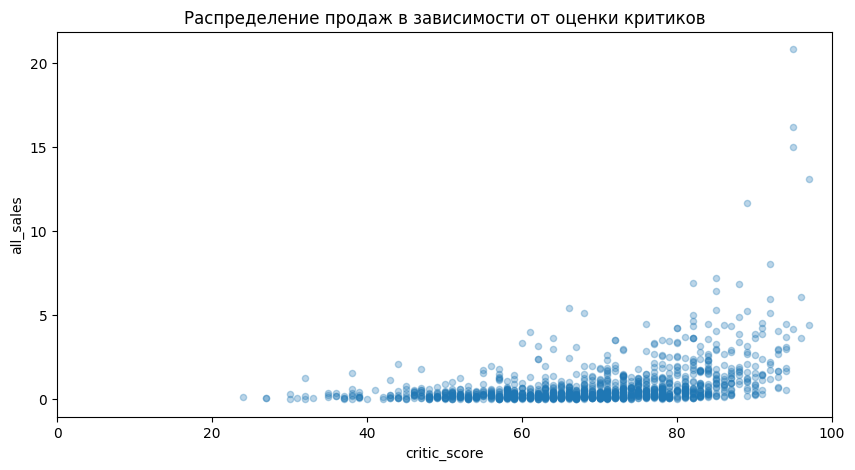

In [74]:
#построим график рассеяния
#в зависимости от оценки критиков
games_data[games_data['platform']=='ps2'].plot(y = 'all_sales',
                                               x = 'critic_score',
                                               kind = 'scatter',
                                               xlim = (0,100),
                                               figsize = (10,5),
                                               alpha = 0.3)                                                                                             
plt.title('Распределение продаж в зависимости от оценки критиков')
plt.show()

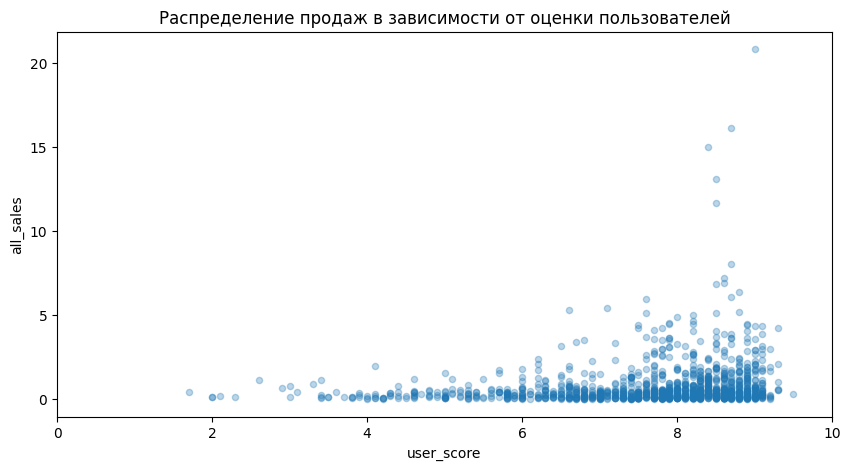

In [75]:
#в зависимости от оценки пользователей
games_data[games_data['platform']=='ps2'].plot(y = 'all_sales',
                                               x = 'user_score',
                                               kind = 'scatter',
                                               xlim = (0,10),
                                               figsize = (10,5),
                                               alpha = 0.3)
plt.title('Распределение продаж в зависимости от оценки пользователей')
plt.show()

В целом, рассеивание подтверждает прямую зависимость продаж от качества оценки. 
Отличие может возникать разве что в некоторых случаях, когда критики и пользователи по разному оценивали игру

Для платформы ps3 значения коэффициента Пирсона : 
critic_score    0.428
user_score      0.144
Name: all_sales, dtype: float64

_________________________________________


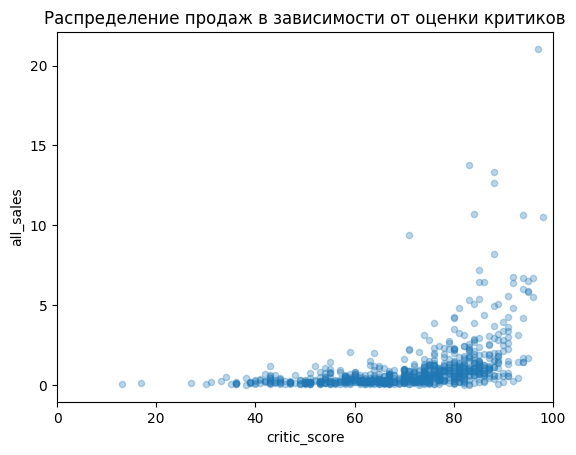

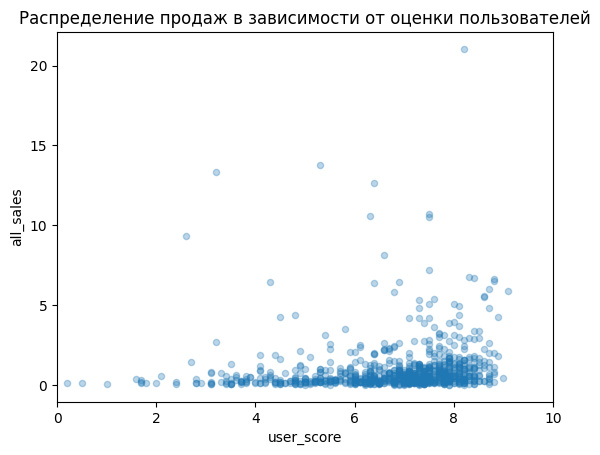

Для платформы x360 значения коэффициента Пирсона : 
critic_score    0.389
user_score      0.110
Name: all_sales, dtype: float64

_________________________________________


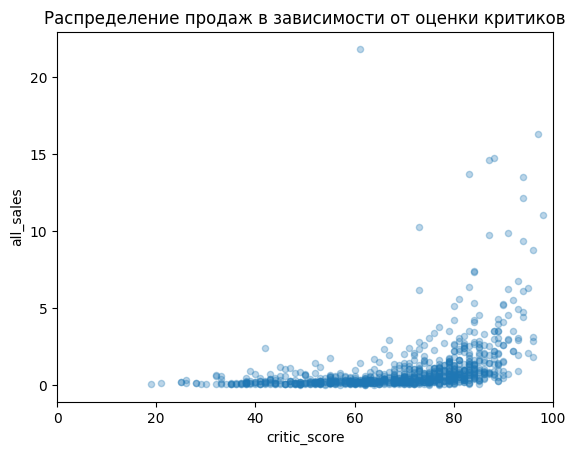

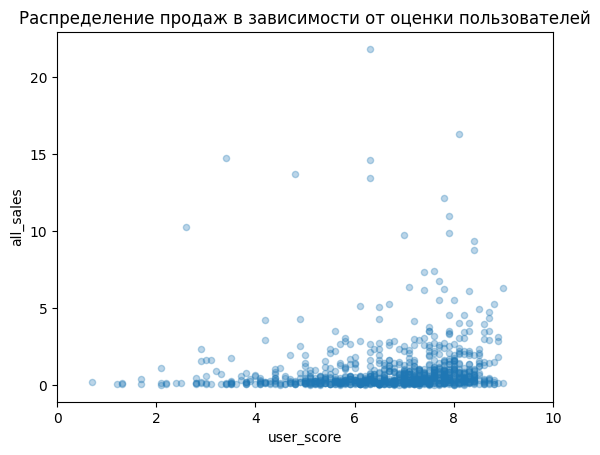

Для платформы ps4 значения коэффициента Пирсона : 
critic_score    0.406
user_score     -0.034
Name: all_sales, dtype: float64

_________________________________________


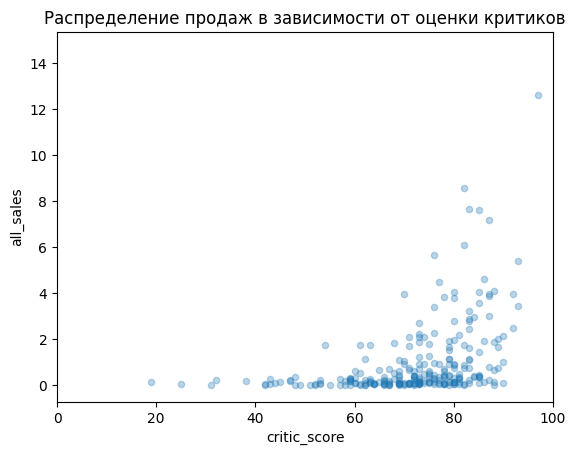

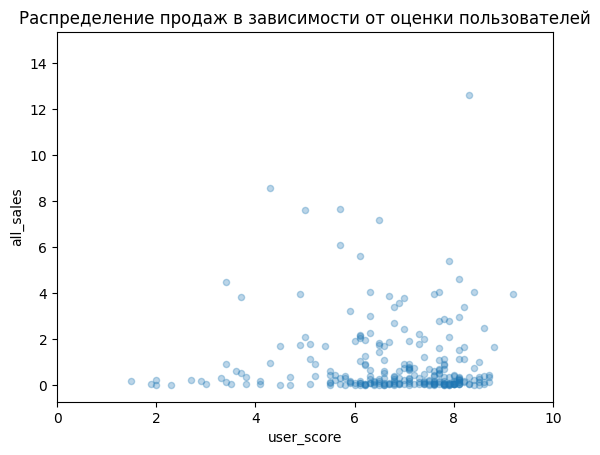

Для платформы 3ds значения коэффициента Пирсона : 
critic_score    0.339
user_score      0.232
Name: all_sales, dtype: float64

_________________________________________


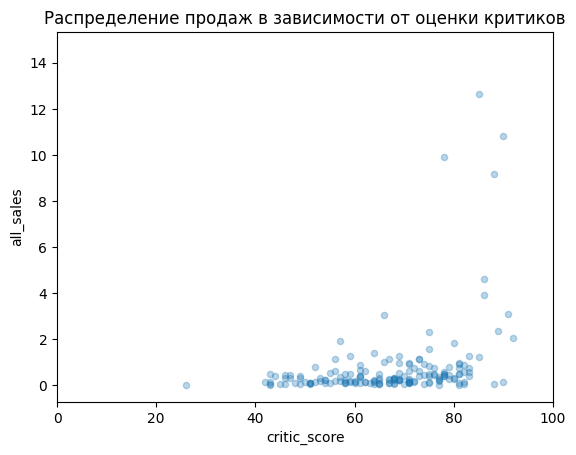

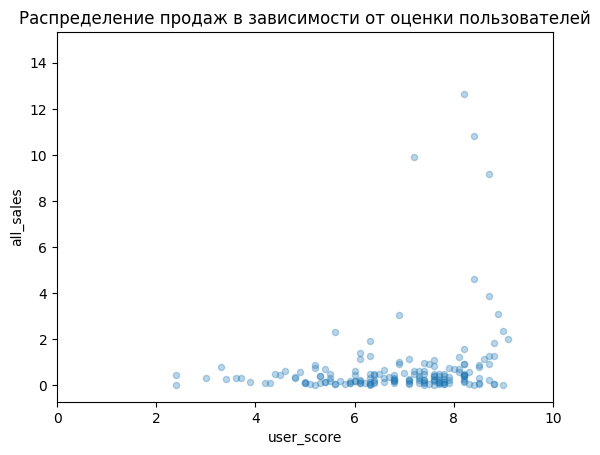

Для платформы ds значения коэффициента Пирсона : 
critic_score    0.232
user_score      0.140
Name: all_sales, dtype: float64

_________________________________________


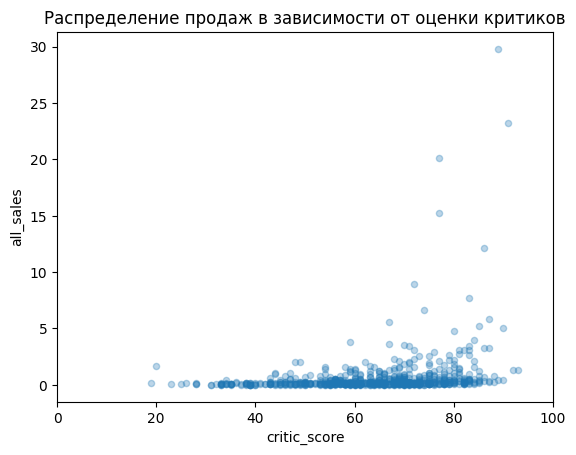

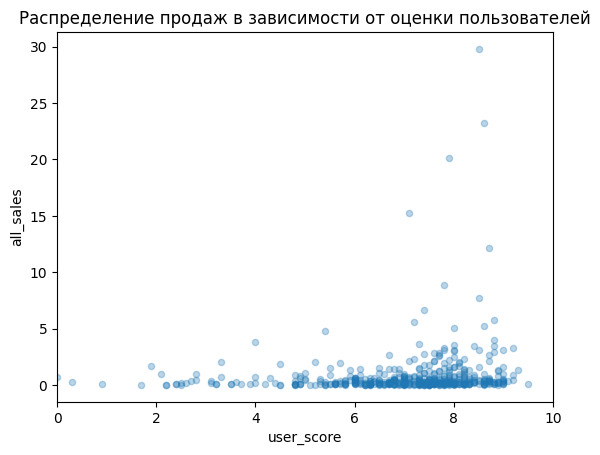

Для платформы xone значения коэффициента Пирсона : 
critic_score    0.410
user_score     -0.094
Name: all_sales, dtype: float64

_________________________________________


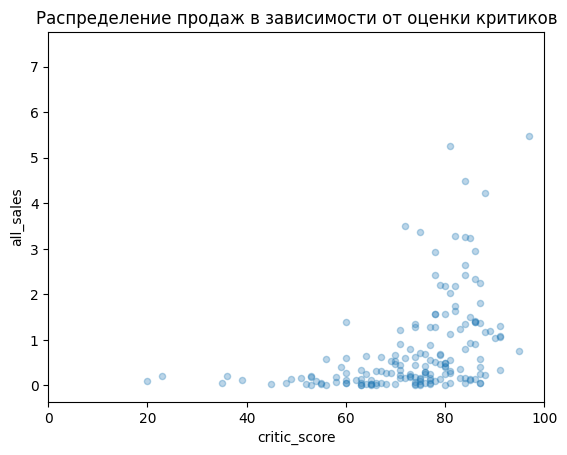

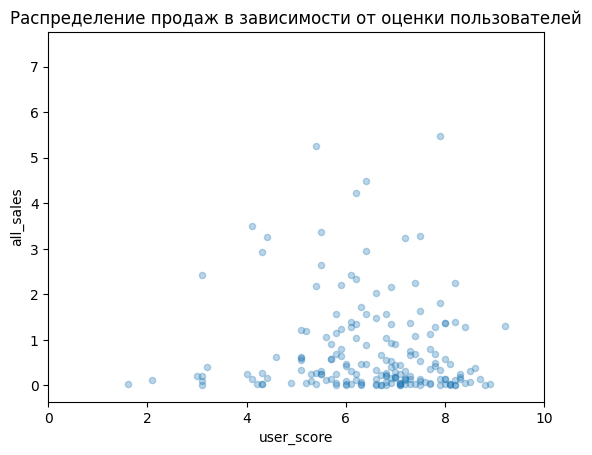

Для платформы wiiu значения коэффициента Пирсона : 
critic_score    0.351
user_score      0.392
Name: all_sales, dtype: float64

_________________________________________


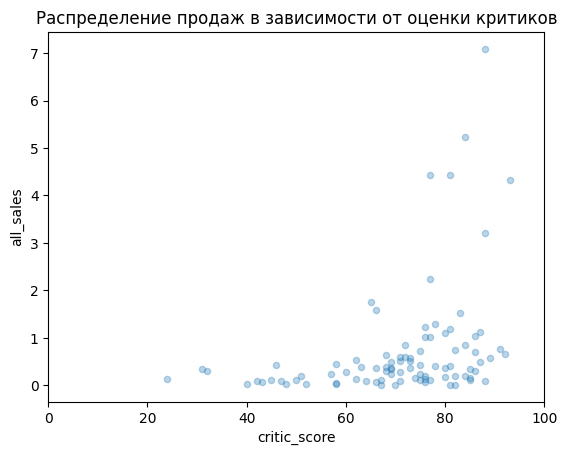

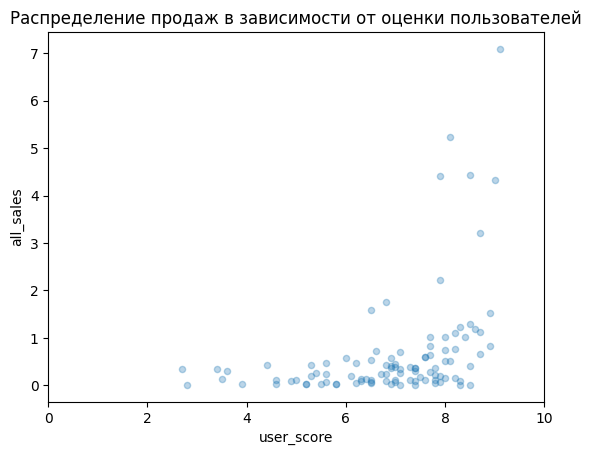

Для платформы wii значения коэффициента Пирсона : 
critic_score    0.171
user_score      0.111
Name: all_sales, dtype: float64

_________________________________________


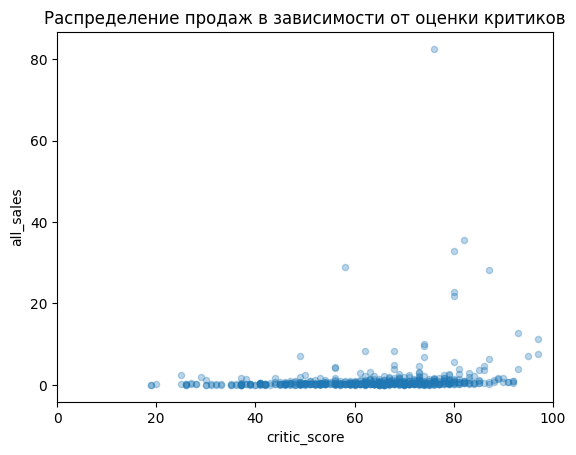

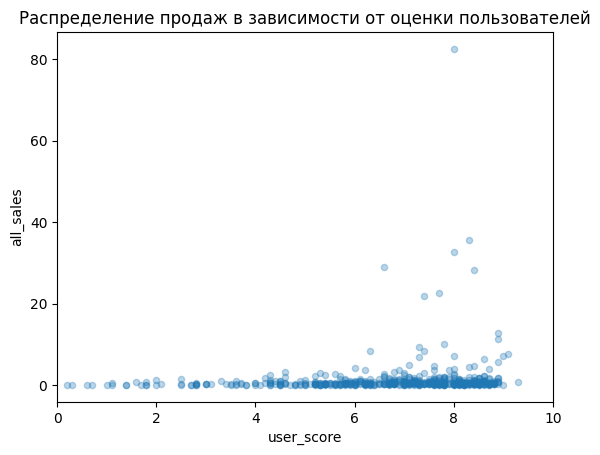

Для платформы pc значения коэффициента Пирсона : 
critic_score    0.257
user_score      0.004
Name: all_sales, dtype: float64

_________________________________________


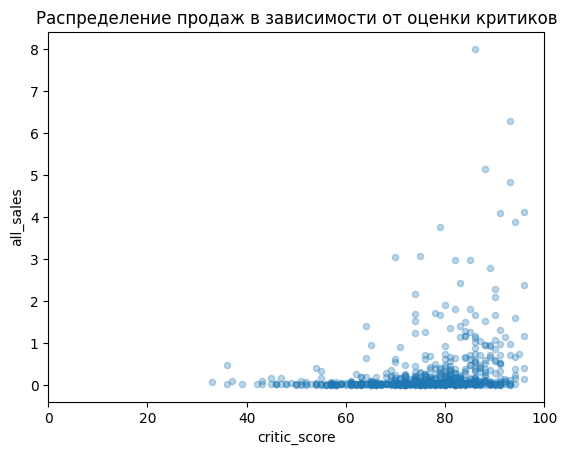

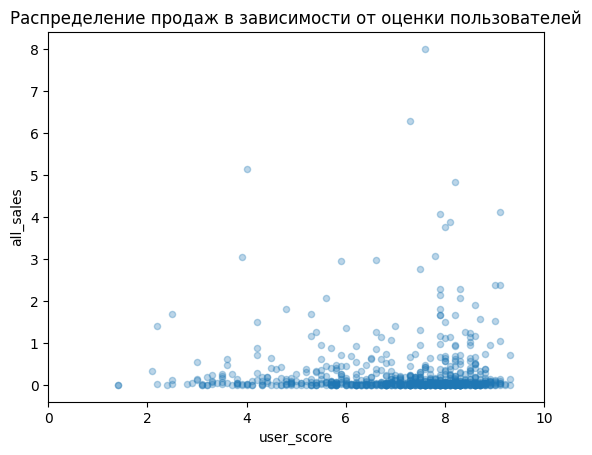

Для платформы psv значения коэффициента Пирсона : 
critic_score    0.132
user_score      0.038
Name: all_sales, dtype: float64

_________________________________________


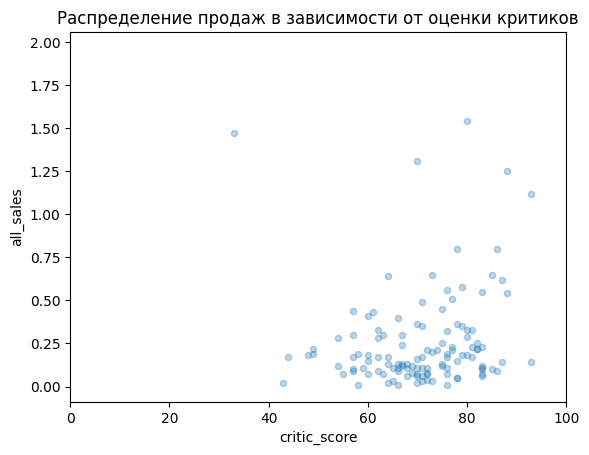

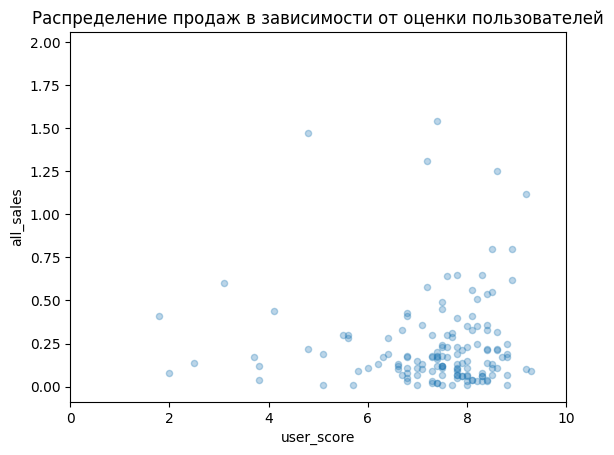

Для платформы psp значения коэффициента Пирсона : 
critic_score    0.300
user_score      0.233
Name: all_sales, dtype: float64

_________________________________________


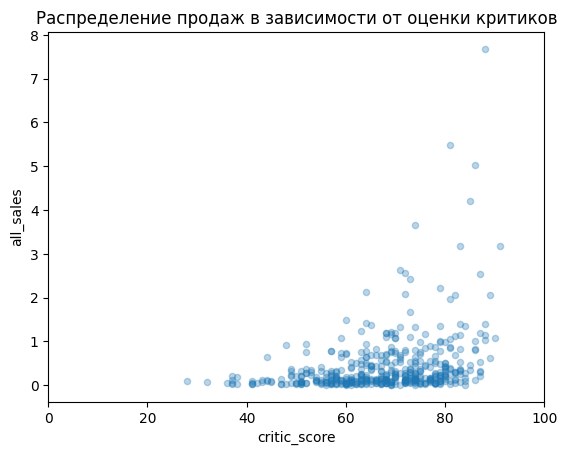

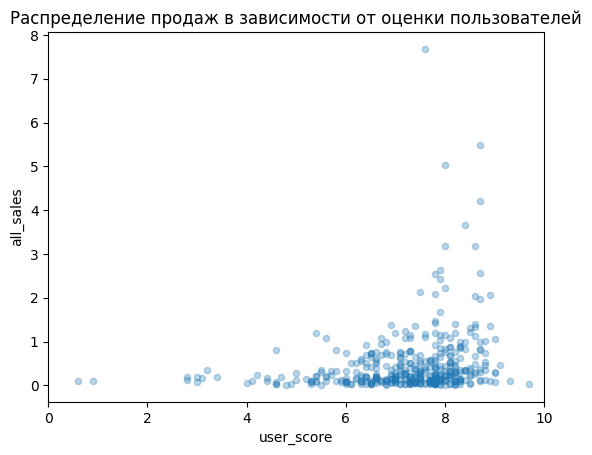

In [76]:
#посчитаем коэффициент корреляции для платформ
for item in list(games_data[games_data['year_of_release']>=2012]["platform"].unique()):
    print(f'Для платформы {item} значения коэффициента Пирсона : \n\
{games_data[(games_data["platform"]==item)&((games_data["critic_score"]>=0)&(games_data["user_score"]>=0))][["all_sales", "critic_score", "user_score"]].corr()["all_sales"][1:].round(3)}')
    print('')
    print('_________________________________________')

    games_data[(games_data['platform']==item)].plot(y = 'all_sales',
                                                    x = 'critic_score',
                                                    kind = 'scatter',
                                                    xlim = (0,100),
                                                    alpha = 0.3) 
    plt.title('Распределение продаж в зависимости от оценки критиков')
    
    games_data[(games_data['platform']==item)].plot(y = 'all_sales',
                                                    x = 'user_score',
                                                    kind = 'scatter',
                                                    xlim = (0,10),
                                                    alpha = 0.3)         
    plt.title('Распределение продаж в зависимости от оценки пользователей')
    plt.show()

Изначальный вывод в большинстве случаев подтверждается: 

- количество продаж больше зависит от оценки критиков, чем от оценок пользователей

- для большинства случаев корреляция продаж и оценок положительна, то есть с увеличением одного параметра, растет и второй.

Для ряда платформ корреляция разнонаправлена или вовсе отсутствует. Это может быть вызвано как малым количеством данных, так спецификой оценивания критиков и пользователей данной платформы.

In [77]:
df = games_data.groupby('genre')[['name','all_sales']].agg({'name':'count', 'all_sales':'sum'}).sort_values('name',ascending = False)
df['realisation'] = df['all_sales'] / df['name']

ТОП-3 самых популярных жанров по количеству игр в них 

              name  all_sales  realisation
genre                                     
platform       878     825.55     0.940262
shooter       1296    1041.36     0.803519
role-playing  1481     931.08     0.628683

3 самых непопулярных жанров по количеству игр в них 

           name  all_sales  realisation
genre                                  
puzzle      569     239.89     0.421599
strategy    673     172.57     0.256419
adventure  1293     233.33     0.180456


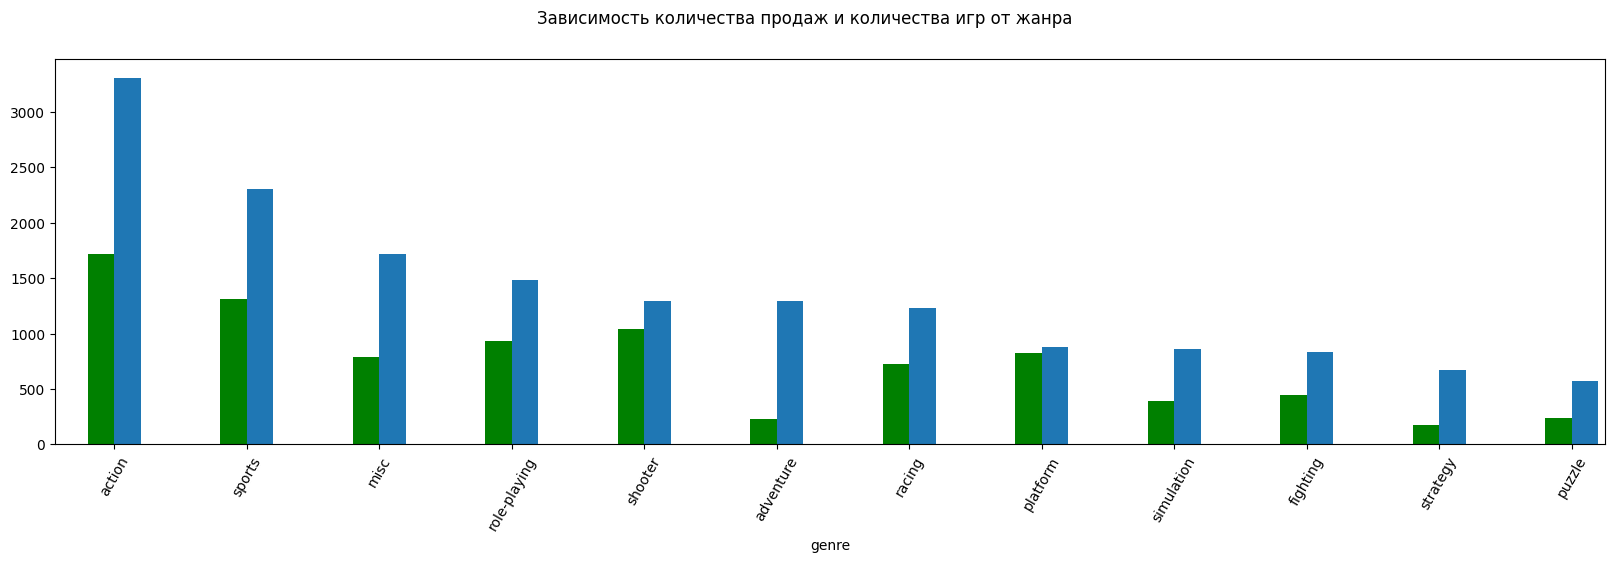

In [78]:
#оценим на общее распределение игр по жанрам
ax = plt.gca()

df['name'].plot(kind ='bar', figsize = (10,5), rot = 60, width = 0.2, position = 0)

df['all_sales'].plot(kind ='bar', figsize = (20,5), rot = 60, color = 'green',  width = 0.2, position = 1)


plt.suptitle('Зависимость количества продаж и количества игр от жанра')


print(f'ТОП-3 самых популярных жанров по количеству игр в них \n\
\n\
{df.sort_values(by = "realisation", ascending = False).head(3)}')

print()

print(f'3 самых непопулярных жанров по количеству игр в них \n\
\n\
{df.sort_values(by = "realisation", ascending = False).tail(3)}')

In [79]:
df.sort_values(by='realisation', ascending = False)

,name,all_sales,realisation
genre,,,
platform,878,825.55,0.940262
shooter,1296,1041.36,0.803519
role-playing,1481,931.08,0.628683
racing,1226,723.49,0.590122
sports,2306,1309.67,0.567940
fighting,837,442.66,0.528865
action,3307,1716.52,0.519057
misc,1721,790.29,0.459204
simulation,857,387.96,0.452695


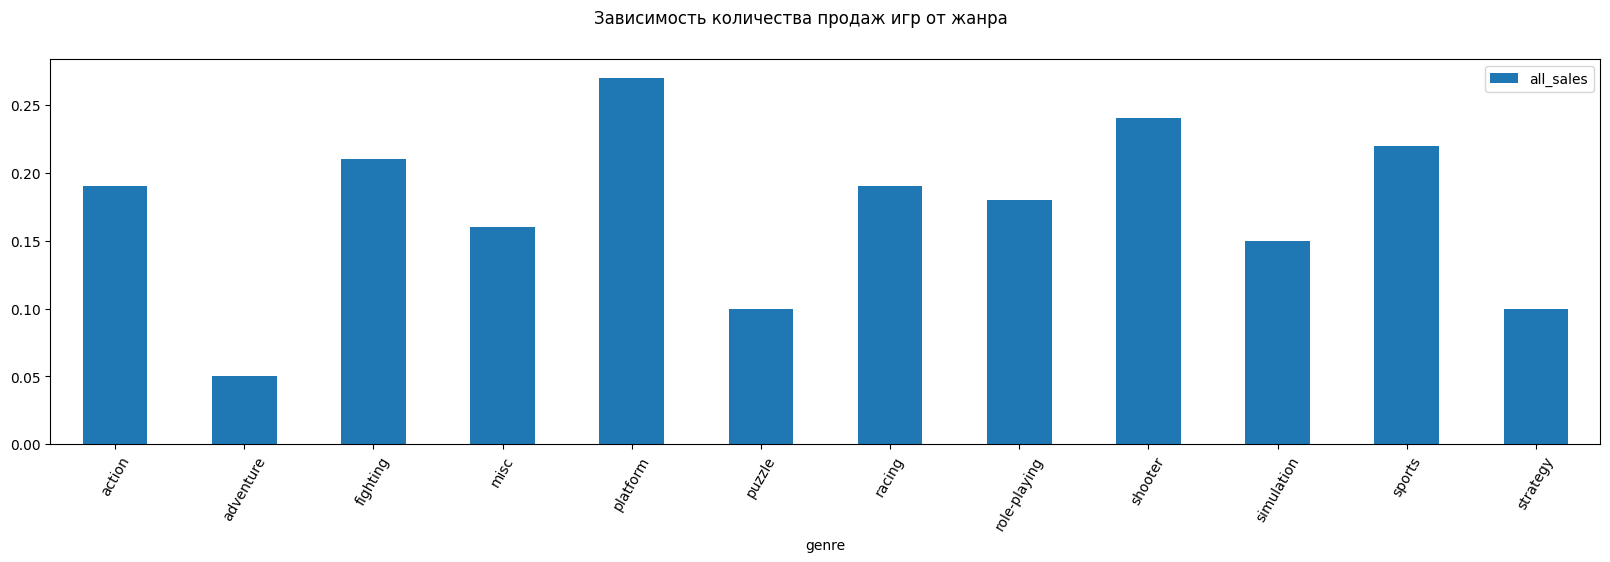

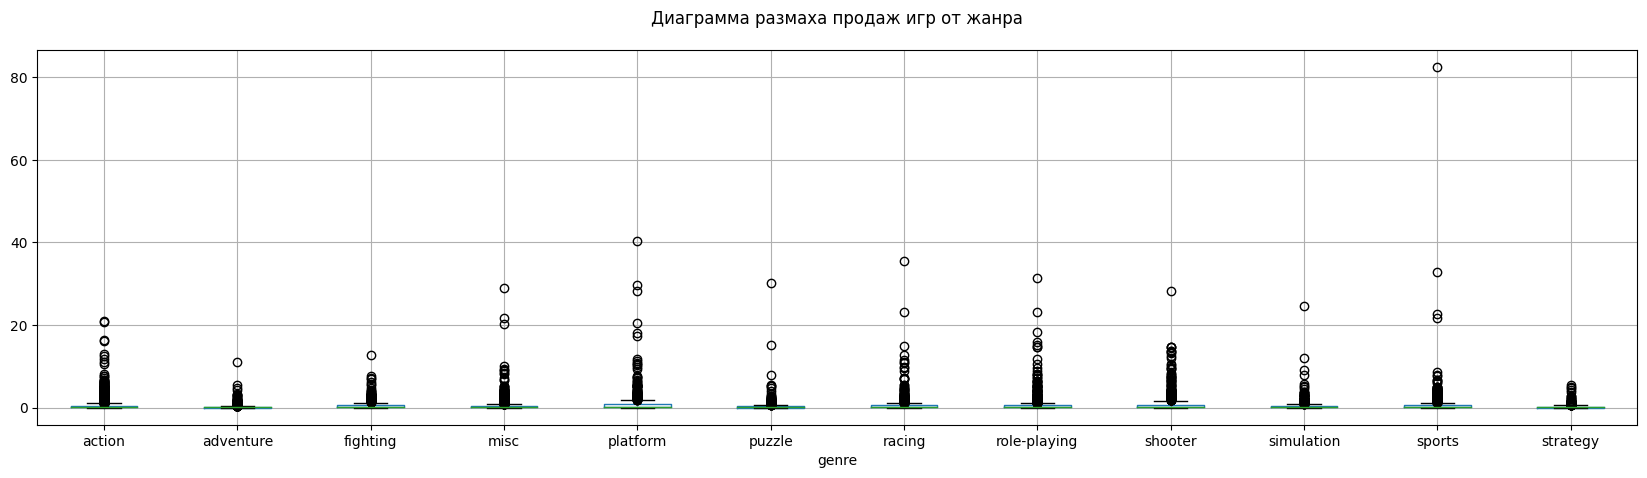

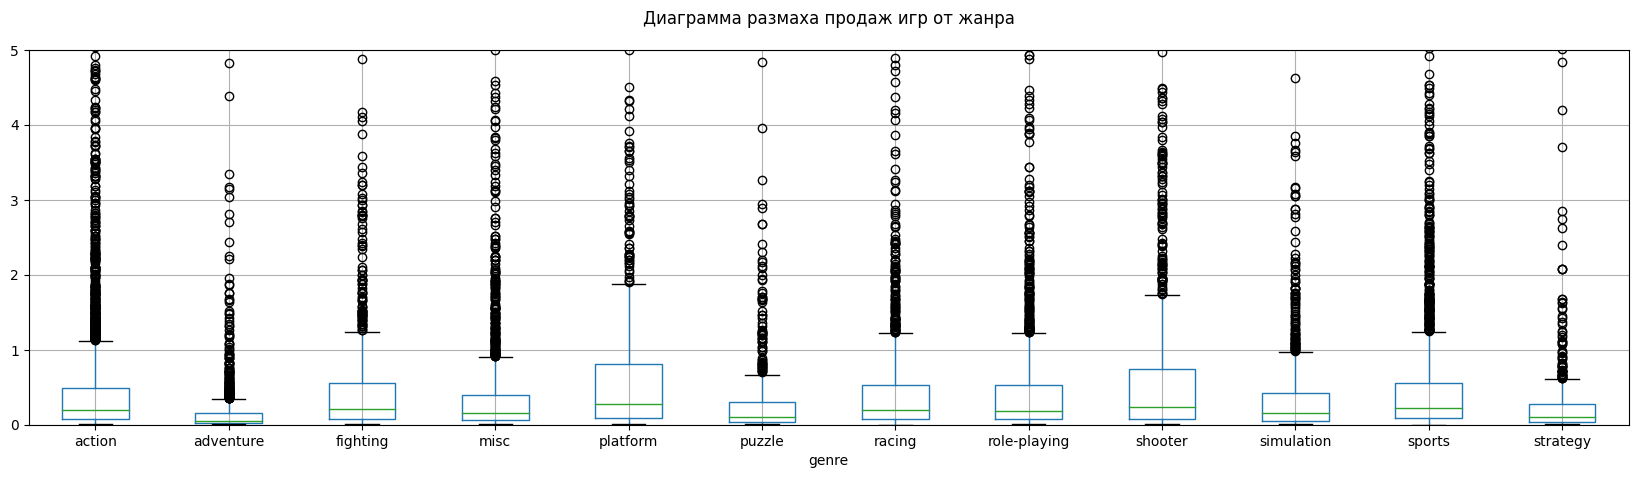

ТОП-3 самых популярных жанров 

          all_sales
genre              
platform       0.27
shooter        0.24
sports         0.22

3 самых непопулярных жанров

           all_sales
genre               
puzzle          0.10
strategy        0.10
adventure       0.05


In [80]:
#оценим на общее распределение медианных продаж по жанрам

games_data.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'median')\
.plot(kind ='bar', figsize = (20,5), rot = 60)
plt.suptitle('Зависимость количества продаж игр от жанра')
plt.show()

games_data.sort_values(by = 'all_sales',ascending = False).boxplot(column = 'all_sales', by = 'genre',figsize = (20, 5))
plt.suptitle('Диаграмма размаха продаж игр от жанра')
plt.title('')
plt.show()

games_data.sort_values(by = 'all_sales',ascending = False).boxplot(column = 'all_sales', by = 'genre',figsize = (20, 5))
plt.ylim(0,5)

plt.suptitle('Диаграмма размаха продаж игр от жанра')
plt.title('')
plt.show()

print(f'ТОП-3 самых популярных жанров \n\
\n\
{games_data.pivot_table(index = "genre", values = "all_sales", aggfunc = "median").sort_values(by = "all_sales", ascending = False).head(3)}')

print('')

print(f'3 самых непопулярных жанров\n\
\n\
{games_data.pivot_table(index = "genre", values = "all_sales", aggfunc = "median").sort_values(by = "all_sales", ascending = False).tail(3)}')

Выделены топ-3 лучших и топ-3 худших жанров.

  Логично предположить, что рядовой игрок предпочитает игры с хорошим сюжетом, хорошей проработкой картинки и механики, а также возможностью мультиплеера. Определенный ряд параметров будет увлекать его. Соответственно, такие жанры, как ~экшн~ платформеры, шутеры и спортивные симуляторы такими обладают. Такие игры, как правило держат игрока в напряжении, что в каком-то смысле дает неплохую эмоциональную или психологическую разгрузку

  Кроме того, игровая индустрия, как жанр развлечения, постоянно развивается и усложняется, требуя все большие характеристики и мощности платформы. 

  Не думаю, что кто-то с новенькой приставкой будет ждать выхода игр по пазлам или что-то в этом духе. Определенно, какому-то определенному контингенту людей такое по душе, но явно не большинству

## Составьте портрет пользователя каждого региона

Портрет пользовтеля каждого региона будем анализирвоать за соответствующий актуальный период, то есть c ~2005~2012 года

In [81]:
actual_top_platforms = games_data[games_data['year_of_release']>=2012].pivot_table(index = 'platform', 
                                                                                   values = ['na_sales', 'jp_sales', 'eu_sales', 'all_sales'], 
                                                                                   aggfunc = 'sum').sort_values('all_sales', ascending = False).head(5).reset_index()
actual_top_platforms.loc[6, 'platform'] = games_data[(games_data['year_of_release']>=2012)&(~games_data['platform'].isin(actual_top_platforms['platform']))]['platform'] = 'other'
for i in ('na_sales', 'jp_sales', 'eu_sales', 'all_sales'):
    actual_top_platforms.loc[6, i] =  games_data[games_data['year_of_release']>=2012].pivot_table(index = 'platform', 
                                                                                                  values = ['na_sales', 'jp_sales', 'eu_sales', 'all_sales'], 
                                                                                                  aggfunc = 'sum')[i].sum()-games_data[games_data['year_of_release']>=2012].pivot_table(index = 'platform', 
                                                                                                                                                                                        values = ['na_sales', 'jp_sales', 'eu_sales', 'all_sales'], 
                                                                                                                                                                                        aggfunc = 'sum').sort_values('all_sales', 
                                                                                                                                                                                        ascending = False)[i].head(5).sum()

actual_top_platforms = actual_top_platforms.set_index('platform')

/var/folders/wd/gl0hh07s1f73kj7kynty4z6r0000gn/T/ipykernel_15487/1854686751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_top_platforms.loc[6, 'platform'] = games_data[(games_data['year_of_release']>=2012)&(~games_data['platform'].isin(actual_top_platforms['platform']))]['platform'] = 'other'


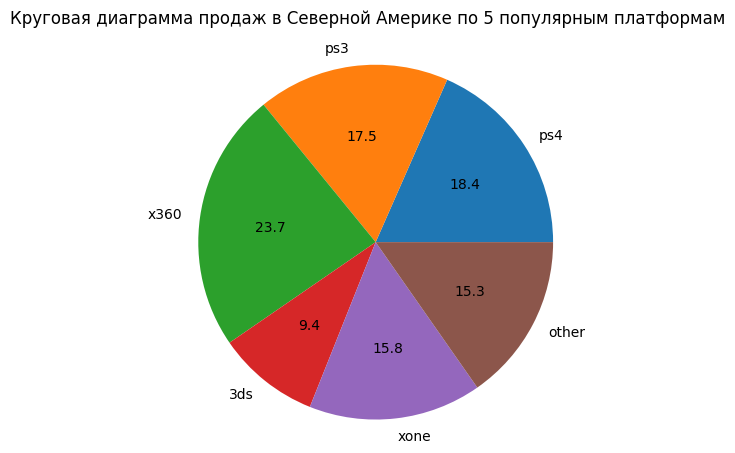

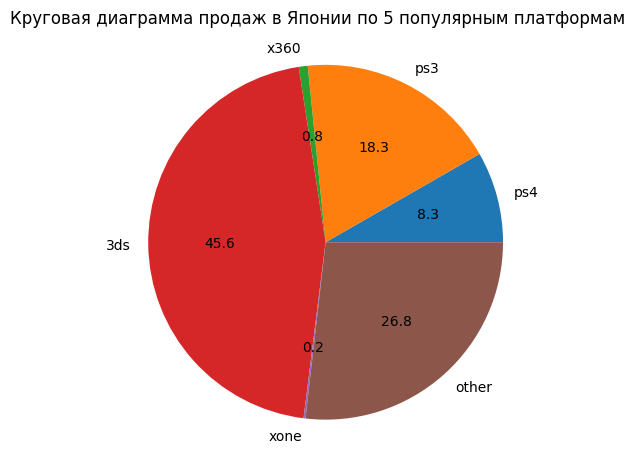

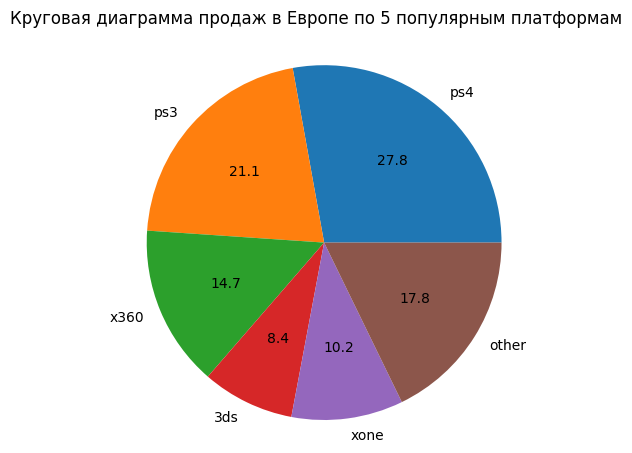

,na_sales,jp_sales,eu_sales
platform,,,
ps4,108.74,15.96,141.09
ps3,103.38,35.29,106.86
x360,140.05,1.57,74.52
3ds,55.31,87.79,42.64
xone,93.12,0.34,51.59
other,90.37,51.63,90.12


In [82]:
#оценим продажи для 5 популярных платформ
print('')

actual_top_platforms['na_sales'].plot(kind = 'pie',autopct='%.1f', subplots = True, radius = 1.2)

plt.suptitle('Круговая диаграмма продаж в Северной Америке по 5 популярным платформам')
plt.ylabel('')
plt.xlabel('')
plt.show()

actual_top_platforms['jp_sales'].plot(kind = 'pie',autopct='%.1f', subplots = True, radius = 1.2)

plt.suptitle('Круговая диаграмма продаж в Японии по 5 популярным платформам')
plt.ylabel('')
plt.xlabel('')
plt.show()

actual_top_platforms['eu_sales'].plot(kind = 'pie',autopct='%.1f', subplots = True, radius = 1.2)

plt.suptitle('Круговая диаграмма продаж в Европе по 5 популярным платформам')
plt.ylabel('')
plt.xlabel('')
plt.show()

#представим таблицу и подсветим максимальные и минимальные значения
display(actual_top_platforms[['na_sales', 'jp_sales', 'eu_sales']].style\
        .highlight_max(color = 'red')\
        .highlight_min(color = 'yellow') \
        .format('{:.2f}'))

**для Северной Америки**

Из гистограмм видно, что высокую долю рынка с 2012 года занимает платформа ***x360***, ***ps4*** и ***ps3***. Причина очевидная - это актуальные платформы, на которые ориентировались производители игр (отсюда и снижение спроса на старые популярные платформы.)

**для Японии**


Значительную долю рынка имеет платформа ***3ds***. Популярность данной компании также подкреплена тем, что производители игр выпускают множество игр, которые ориентируются на инетересы японского населения.

Популярнсть в Японии платформы ***x360*** и ***xone*** из данной 5-ки  низкая, и связана она с тем, что это  продукт американского рынка 

26,8% рынка - это другие платформы, не входящие в топ-5 

**для Европы**

Предпочтения платформ европейского рынка схож с северо-американским. 
Самой популярной является платформа ***ps4***, затем распределились ***ps3***, ***x360*** 

In [83]:
top_genres = games_data[games_data['year_of_release']>=2012].pivot_table(index = 'genre', 
                                                                         values = ['na_sales', 'jp_sales', 'eu_sales', 'all_sales'], 
                                                                         aggfunc = 'sum').sort_values('all_sales', 
                                                                         ascending = False).head(5).reset_index()
top_genres.loc[6, 'genre'] = games_data[(games_data['year_of_release']>=2012)&(~games_data['genre'].isin(top_genres['genre']))]['genre'] = 'other'
for i in ('na_sales', 'jp_sales', 'eu_sales', 'all_sales'):
    top_genres.loc[6, i] =  games_data[games_data['year_of_release']>=2012].pivot_table(index = 'genre', 
                                                                                        values = ['na_sales', 'jp_sales', 'eu_sales', 'all_sales'], 
                                                                                        aggfunc = 'sum')[i].sum()-games_data[games_data['year_of_release']>=2012].pivot_table(index = 'genre', 
                                                                                                                                                                              values = ['na_sales', 'jp_sales', 'eu_sales', 'all_sales'], 
                                                                                                                                                                              aggfunc = 'sum').sort_values('all_sales', 
                                                                                                                                                                              ascending = False)[i].head(5).sum()

top_genres = top_genres.set_index('genre')

top_genres

/var/folders/wd/gl0hh07s1f73kj7kynty4z6r0000gn/T/ipykernel_15487/2784540272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_genres.loc[6, 'genre'] = games_data[(games_data['year_of_release']>=2012)&(~games_data['genre'].isin(top_genres['genre']))]['genre'] = 'other'


,all_sales,eu_sales,jp_sales,na_sales
genre,,,,
action,441.12,159.34,52.80,177.84
shooter,304.73,113.47,9.23,144.77
role-playing,192.80,48.53,65.44,64.00
sports,181.07,69.09,8.01,81.53
misc,85.04,26.32,12.86,38.19
other,241.77,90.07,44.24,84.64


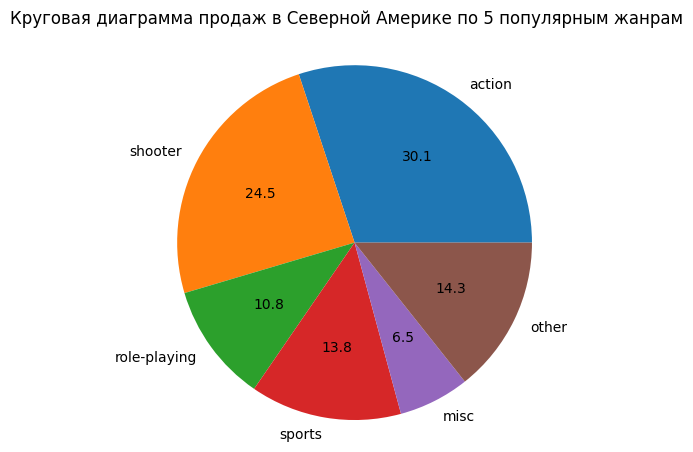

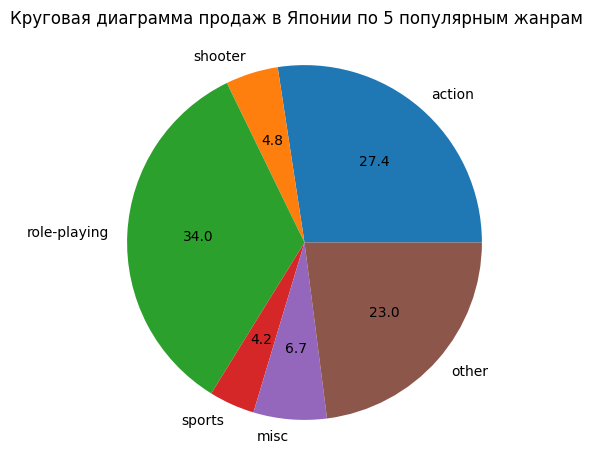

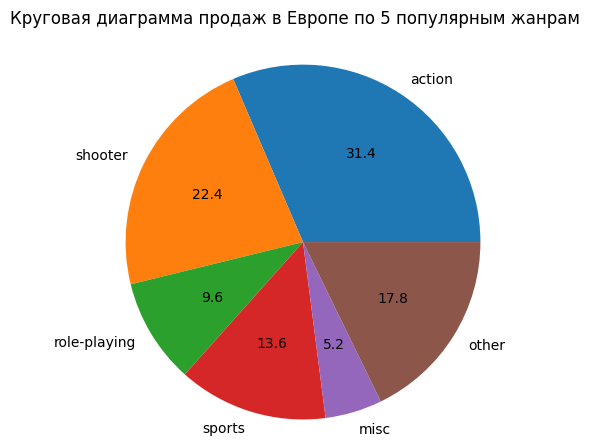

,na_sales,jp_sales,eu_sales
genre,,,
action,177.84,52.80,159.34
shooter,144.77,9.23,113.47
role-playing,64.00,65.44,48.53
sports,81.53,8.01,69.09
misc,38.19,12.86,26.32
other,84.64,44.24,90.07


In [84]:
#оценим продажи для 5 популярных жанров

top_genres['na_sales'].plot(kind = 'pie', subplots = True,  autopct='%.1f' , radius = 1.2)

plt.suptitle('Круговая диаграмма продаж в Северной Америке по 5 популярным жанрам')
plt.ylabel('')
plt.xlabel('')
plt.show()


top_genres['jp_sales'].plot(kind = 'pie', subplots = True,  autopct='%.1f' , radius = 1.2)

plt.suptitle('Круговая диаграмма продаж в Японии по 5 популярным жанрам')
plt.ylabel('')
plt.xlabel('')
plt.show()

top_genres['eu_sales'].plot(kind = 'pie', subplots = True,  autopct='%.1f' , radius = 1.2)

plt.suptitle('Круговая диаграмма продаж в Европе по 5 популярным жанрам')
plt.ylabel('')
plt.xlabel('')
plt.show()


plt.show()

#представим таблицу
display(top_genres[['na_sales', 'jp_sales','eu_sales']].style\
        .highlight_max(color = 'red')\
        .highlight_min(color = 'yellow') \
        .format('{:.2f}'))

**для Северной Америки**

Явное преимущество за жанром *Action*. 


**для Японии**

Высокая доля продаж игр жанра *RPG*

**для Европы**

Определенно *Action*

В целом, основное предпочетение у всех одинаковое - *Action* занимает лидирующие позиции в каждом регионе. Предпочтения игроков из Северной Америки и Европы совпадают.

 То же самое относится к аудитории каждого региона, предпочитающим *Adventure* - везде 5-ое из 5 мест.


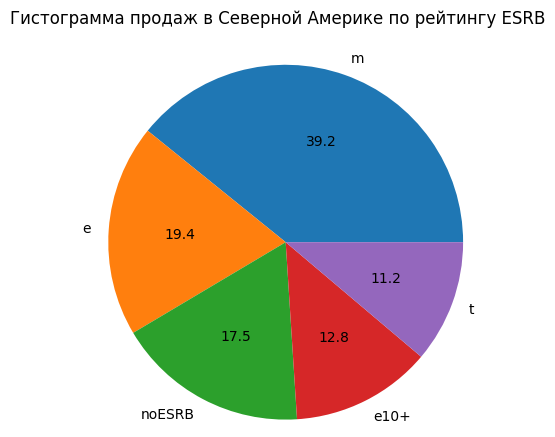

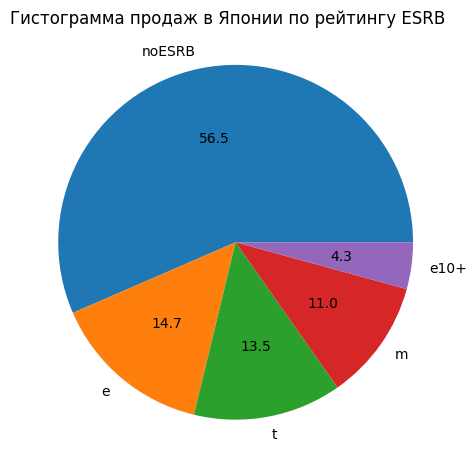

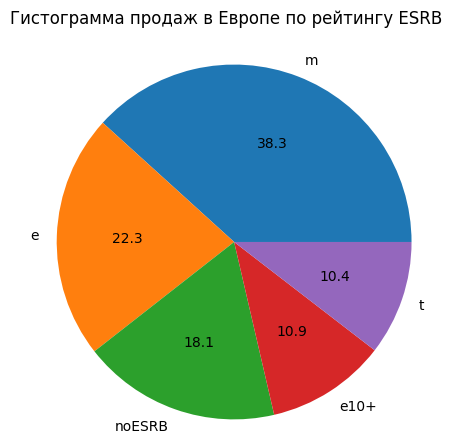

,eu_sales,jp_sales,na_sales
rating,,,
e,113.03,28.33,114.37
e10+,55.37,8.19,75.70
m,193.96,21.20,231.57
noESRB,91.50,108.84,103.31
t,52.96,26.02,66.02


In [85]:
#оценим продажи по рейтингу ESRB

games_data[(games_data['year_of_release']>=2012)].pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum') \
.sort_values(by = 'na_sales', ascending = False)\
.plot(kind = 'pie', subplots = True,  legend = False,  autopct='%.1f' , radius = 1.2)

plt.suptitle('Гистограмма продаж в Северной Америке по рейтингу ESRB')
plt.ylabel('')
plt.xlabel('')

games_data[(games_data['year_of_release']>=2012)].pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum') \
.sort_values(by = 'jp_sales', ascending = False)\
.plot(kind = 'pie', subplots = True, legend = False,  autopct='%.1f' , radius = 1.2)

plt.suptitle('Гистограмма продаж в Японии по рейтингу ESRB')
plt.ylabel('')
plt.xlabel('')

games_data[(games_data['year_of_release']>=2012)].pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum') \
.sort_values(by = 'eu_sales', ascending = False)\
.plot(kind = 'pie', subplots = True,  legend = False, autopct='%.1f' , radius = 1.2)

plt.suptitle('Гистограмма продаж в Европе по рейтингу ESRB')
plt.ylabel('')
plt.xlabel('')

plt.show()

#представим таблицу
display(games_data[(games_data['year_of_release']>=2012)].pivot_table(index = 'rating', values = ['na_sales', 'jp_sales','eu_sales'], aggfunc = 'sum').style\
        .highlight_max(color = 'red')\
        .highlight_min(color = 'yellow') \
        .format('{:.2f}'))

**для Северной Америки**

Самыми популярными являются игры рейтинга *E*, *M* и *T*


**для Японии**

Самыми популярными являются игры рейтинга, которые не имеют рейтинга ESRB, затем идут *E*, *T* и *M*

**для Европы**

Самыми популярными являются игры рейтинга *E*, *M* и *T*

 Здесь также наблюдается общая тенденция пользователей. 
 
 Популярность игр по рейтингу ESRB обуславливается возрастными ограничеениями аудитории:

- Игры с рейтингом *E* - для всех без ограничения, то есть максимально возможная аудитория

- Игры с рейтингом *T* - тинейджеры

- Игры с рейтингом *M* - от 17 лет

Для Японии больше половины продаж - это игры, не имеющая рейтинг ESRB

Как правило, высокобюджетные и популярные проекты стараются сделать на максимально возможную аудиторию. Более захватывающие и увлекательные игры уже могут иметь ограничения, в связи с чем их продажи несколько меньше, при этом это не влияет на оценку пользователей и критиков.

Также можно выделить возможную культуру страны:

для Северной Америки или Европы вероятность того, что подросток купит игру со взрослым более высокая, чем в традиционной Японии


## Проверьте гипотезы

Для проверки нулевых гипотез будем выдвигать альтернативную с отличным от первончального условия

Для сравнения применим t-тест для сравнения независимых выборок

**Гипотезы**

- H0 - Средние пользовательские рейтинги платформ ***Xbox One*** и ***PC*** одинаковые

- H1 - Средние пользовательские рейтинги платформ ***Xbox One*** и ***PC*** различаются

In [86]:
#создаем соответствующие выборки
xone_user_score = games_data[(games_data['platform']=='xone')&(games_data['user_score'].isna() == False)]['user_score'].reset_index(drop =True)
pc_user_score = games_data[(games_data['platform']=='pc')&(games_data['user_score'].isna() == False)]['user_score'].reset_index(drop =True)
print('Среднепользовательское значение для xone', xone_user_score.mean())
print('Среднепользовательское значение для pc', pc_user_score.mean())

#зададим критическое отклонение (далле оно будет использоваться для всех экспериментов)
alpha = .05

#результат t-теста для независимых выборок 
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var = False)

#расчитаем значение параметра P и сравними полученное значение с принятым отклонением
print ('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


Среднепользовательское значение для xone 4.542105263157895
Среднепользовательское значение для pc 5.36342737722048
p-значение 0.0012202763945006337
Отвергаем нулевую гипотезу


In [87]:
#создаем соответствующие выборки
xone_user_score = games_data[(games_data['platform']=='xone')&(games_data['user_score'].isna() == False)&(games_data['year_of_release']>=2012)]['user_score'].reset_index(drop =True)
pc_user_score = games_data[(games_data['platform']=='pc')&(games_data['user_score'].isna() == False)&(games_data['year_of_release']>=2012)]['user_score'].reset_index(drop =True)
print('Среднепользовательское значение для xone', xone_user_score.mean())
print('Среднепользовательское значение для pc', pc_user_score.mean())


#результат t-теста для независимых выборок 
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var = False)

#расчитаем значение параметра P и сравними полученное значение с принятым отклонением
print ('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')



Среднепользовательское значение для xone 4.542105263157895
Среднепользовательское значение для pc 5.1212
p-значение 0.05619765758385681
Не отвергаем нулевую гипотезу


Если брать выборку за все время существования, среднепользовательская оценка игроков на ***xone*** и на ***pc*** c большей вероятностью будет отличаться друг от друга, а если рассматривать случайную выборку с 2012 года и позже, то вероятность опровержения нулевой гипотезы ниже.

**Гипотезы**

- H0 - Средние пользовательские рейтинги жанров *Action* (англ. «действие», экшен-игры) и *Sports* (англ. «спортивные соревнования») одинаковые


- H1 - Средние пользовательские рейтинги жанров *Action* (англ. «действие», экшен-игры) и *Sports* (англ. «спортивные соревнования») разные

In [88]:
#создаем соответствующие выборки
action_user_score = games_data[(games_data['genre']=='action')&(games_data['user_score'].isna() == False)]['user_score'].reset_index(drop = True)
sports_user_score = games_data[(games_data['genre']=='sports')&(games_data['user_score'].isna() == False)]['user_score'].reset_index(drop = True)

print('Среднепользовательское значение для action', action_user_score.mean())
print('Среднепользовательское значение для sports', sports_user_score.mean())

#результат t-теста для независимых выборок 
results = st.ttest_ind(action_user_score, sports_user_score, equal_var = False)

#расчитаем значение параметра P и сравними полученное значение с принятым отклонением
print ('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднепользовательское значение для action 3.376292712428182
Среднепользовательское значение для sports 2.7274501300954035
p-значение 7.595997985225105e-09
Отвергаем нулевую гипотезу


In [89]:
#создаем соответствующие выборки
action_user_score = games_data[(games_data['genre']=='action')&(games_data['user_score'].isna() == False)&(games_data['year_of_release']>=2012)]['user_score'].reset_index(drop =True)
sports_user_score = games_data[(games_data['genre']=='sports')&(games_data['user_score'].isna() == False)&(games_data['year_of_release']>=2012)]['user_score'].reset_index(drop =True)

print('Среднепользовательское значение для action', action_user_score.mean())
print('Среднепользовательское значение для sports', sports_user_score.mean())

#результат t-теста для независимых выборок 
results = st.ttest_ind(action_user_score, sports_user_score, equal_var = False)

#расчитаем значение параметра P и сравними полученное значение с принятым отклонением
print ('p-значение', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднепользовательское значение для action 2.969447138700291
Среднепользовательское значение для sports 3.6973880597014923
p-значение 0.0020018209559324713
Отвергаем нулевую гипотезу


В t-тестах параметр equal_var брался равным *False*, так как выборки имеют разные дисперсии. 

Также, учитывая разные условия выборки (в моем случае сначала учитывались данные до 2012 года. во втором - нет) можно получить обратные результаты. Можно заключить, что вероятность сделать правильный вывод при условии, что нулевая гипотеза верна мала

# Общий вывод

После бурного роста количества выпускаемых игр в год вплоть до 2008, последние годы показали снижение данного показателя и на 2015-2016 год равен 500..600 игр в год. Объяснить это можно тем, что индустрия развивается и вместе с этим усложняется техническая реализация проектов (они стали требовать больше вложений, времени и человеческого ресурса в разработке и прочее).

Из построения графика "Распределение количества проданных копий игр на разных платформах относительно года" видно, как одно поколение приставок сменялось другим:

- с 2000 и до 2004 почти ежегдно росли продажи ***ps2***

- в 2004 году в продажу вышли ***ds*** и из-за конкуренции продажи ***ps2*** начали уменьшаться

- в 2006 на рынок вышло новое поколение приставок ***ps3***, ***x360***, ***wii*** (последний к слову продавался активней всех по началу, но затем резко уменьшился спрос в результате чего, в долгосрочном измерении продажи конкурентов оказались выше)

В среднем, средняя продлжительость жизни платформ ~ 9 лет

В качестве акутального периода можно выбрать данные после 2011 года (то есть с 2012 включительно), так как именно в этот год начался выпуск большинства самых продающихся платформ, а также учитывая среднюю "жизнь" платформ.

На конце 2016 года акутальными платформами являются:

- ***ps4*** - продажи на 2016 год составляют 69,25 млн игр на платформу

- ***xone*** - продажи на 2016 год составляют 26,15 млн игр на платформу

- ***3ds*** - продажи на 2016 год составляют 15,14 млн игр на платформу

Стоит отметить, что данные за 2016 год могут быть неполными (по условию). Например, если данные собраны за первые полгода 2016. При этом, судя по данным, можно предположить, что растут продажи игр у ***ps4*** и ***xone*** и тренд продолжится в следующем году. Игры же для остальных платформ или остаются на том же уровне продаж, или уже имеют убывающий тренд.

Причина их большого объема продаж и их растущего тренда продаж прежде всего возраст - высокий спрос на игры молодых и мощных платформ, относительно своих конкурентов в лице ***ps3***, ***xbox360***, ***wii***. 

Также можно отметить "переток" покупателей игр, когда выходит новое поколение:

- ***ds*** и ***3ds*** в 2011

- ***ps3*** и ***ps4*** в 2014

- ***x360*** и ***xone*** в 2014

- ***wii*** и ***wiiu*** в 2013

- ***psp*** и ***psv*** в 2012

Соласно графику "ящик с усами", среди популярных платформ медианное значение расположено около 0,25 млн копий.

Верхняя граница графиков распределена неравномерно, которые определяют выбросы: 

- для ***ps3*** и ***x360*** значения ~ 1,7 млн

- для ***wii*** и ***ps2*** лежат в диапазоне 1,1 .. 1,3 млн

Довольно сильно среди выборки выделяется ds: 

- медиана 0,11 млн 

- верхняя граница 0,6 млн

Соответственно, для более популярных платформ средняя величина будет больше. Верхняя граница определяет количество удачных проектов для данной платформы - чем выше граница, тем больше таких проектов было 

Графики рассеивания в большинстве случаев подтверждали прямую зависимость продаж от качества оценки: 

- количество продаж больше зависит от оценки критиков, чем от оценок пользователей

- для большинства случаев корреляция продаж и оценок положительна, то есть с увеличением одного параметра, растет и второй.

Для ряда платформ корреляция разнонаправлена или вовсе отсутствует. Это может быть вызвано как малым количеством данных, так спецификой оценивания критиков и пользователей данной платформы.

Выделены топ-3 лучших и топ-3 худших жанров.

**Update**: По двум методам было определено, что наибольее прибыльным жанром является *platform*, затем *shooter*, неприбыльными и непопулярными -  *adventure*, *strategy*, *puzzle*

  Логично предположить, что рядовой игрок предпочитает игры с хорошим сюжетом, хорошей проработкой картинки и механики, а также возможностью мультиплеера. Определенный ряд параметров будет увлекать его. Соответственно, такие жанры, как экшн и спортивные симуляторы такими обладают. Такие игры, как правило держат игрока в напряжении, что в каком-то смысле дает неплохую эмоциональную или психологическую разгрузку

  Кроме того, игровая индустрия, как жанр развлечения, постоянно развивается и усложняется, требуя все большие характеристики и мощности платформы. 

  Не думаю, что кто-то с новенькой приставкой будет ждать выхода игр по пазлам или что-то в этом духе. Определенно, какому-то определенному контингенту людей такое по душе, но явно не большинству.
  
Анализ портрета пользователя каждого региона показал:

**для Северной Америки**

- высокую долю рынка с 2012 года занимает платформа ***x360***, ***ps4*** и ***ps3***. Причина очевидная - это актуальные платформы, на которые ориентировались производители игр (отсюда и снижение спроса на старые популярные платформы

- любимый жанр *Action* 

- основные продажи - игры рейтинга *E*, *M* и *T*

**для Японии**


- значительную долю рынка имеет платформа ***3ds***. Популярность данной компании также подкреплена тем, что производители игр выпускают множество игр, которые ориентируются на инетересы японского населения. Популярнсть в Японии платформы ***x360*** из данной 5-ки самая низкая, и связана она с тем, что это  продукт американского рынка 
 
- высокая доля продаж игр жанра *RPG*

- основные продажи - это игры без рейтинга ESRB, а среди игр, которые имеют рейтинг - популярные игры рейтинга *E*, *M* и *T*

**для Европы**

- предпочтения платформ европейского рынка схож с северо-американским. Самой популярной является платформа ***ps4***
 
- популярны жанр *Action*

- самыми популярными являются игры рейтинга *E*, *M* и *T*

Здесь также наблюдается общая тенденция пользователей. 
 
 Популярность игр по рейтингу ESRB обуславливается возрастными ограничеениями аудитории:

- Игры с рейтингом *E* - для всех без ограничения, то есть максимально возможная аудитория

- Игры с рейтингом *T* - тинейджеры

- Игры с рейтингом *M* - от 17 лет

Как правило, высокобюджетные и популярные проекты стараются сделать на максимально возможную аудиторию. Более захватывающие и увлекательные игры уже могут иметь ограничения, в связи с чем их продажи несколько меньше, при этом это не влияет на оценку пользователей и критиков.

Также можно выделить возможную культуру страны:

для Северной Америки или Европы вероятность того, что подросток купит игру со взрослым более высокая, чем в традиционной Японии

Анализ гипотез показал:

- средние пользовательские рейтинги платформ Xbox One и PC вероятнее всего будут отличаться (нулевая гипотеза об их равенстве можно отклонена, так как ее вероятность крайне мала)

- средние пользовательские рейтинги жанров *Action* (англ. «действие», экшен-игры) и *Sports* (англ. «спортивные соревнования») в большинстве случаев будут отличаться (в актуальный период нулевая гипотеза вероятность верного исхода почти равна 0, что ниже заданного критического отклонения)